##Bài 1 Thực hiện lại các bước như hướng dẫn để xây dựng mô hình phân lớp Naive Bayes cho bài toán phân loại cảm xúc người dùng dựa trên bộ dữ liệu UIT-VSFC.

In [2]:
import pandas as pd
X_train = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/train/sents.txt',sep='\n', header=None, index_col=None)
y_train = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/train/sentiments.txt',sep='\n', header=None, index_col=None)

In [3]:
X_dev = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/train/sents.txt', sep='\n',header=None, index_col=None)
y_dev = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/train/sentiments.txt',sep='\n', header=None, index_col=None)

In [4]:
X_test = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/train/sents.txt',sep='\n', header=None, index_col=None)
y_test = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/train/sentiments.txt',sep='\n', header=None, index_col=None)

In [5]:
y_train = y_train.values.flatten()
y_dev = y_dev.values.flatten()
y_test = y_test.values.flatten()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
encoder = CountVectorizer(ngram_range=(2, 2))
encoder.fit(X_train[0])

CountVectorizer(ngram_range=(2, 2))

In [7]:
encoder.vocabulary_


{'slide giáo': 19651,
 'giáo trình': 7042,
 'trình đầy': 23733,
 'đầy đủ': 30215,
 'nhiệt tình': 15712,
 'tình giảng': 24486,
 'giảng dạy': 7216,
 'dạy gần': 5850,
 'gần gũi': 7752,
 'gũi với': 7734,
 'với sinh': 27898,
 'sinh viên': 19599,
 'đi học': 29041,
 'học đầy': 9663,
 'đủ full': 31210,
 'full điểm': 6736,
 'điểm chuyên': 29158,
 'chuyên cần': 1996,
 'chưa áp': 2398,
 'áp dụng': 28786,
 'dụng công': 6383,
 'công nghệ': 4229,
 'nghệ thông': 14845,
 'thông tin': 21499,
 'tin và': 22823,
 'và các': 26723,
 'các thiết': 3263,
 'thiết bị': 20690,
 'bị hỗ': 1334,
 'hỗ trợ': 9803,
 'trợ cho': 24094,
 'cho việc': 1928,
 'việc giảng': 26506,
 'thầy giảng': 21839,
 'giảng bài': 7185,
 'bài hay': 567,
 'hay có': 7940,
 'có nhiều': 3872,
 'nhiều bài': 15482,
 'bài tập': 670,
 'tập ví': 25371,
 'ví dụ': 27343,
 'dụ ngay': 6325,
 'ngay trên': 14592,
 'trên lớp': 23548,
 'giảng viên': 7312,
 'viên đảm': 26412,
 'đảm bảo': 30149,
 'bảo thời': 1145,
 'thời gian': 22458,
 'gian lên': 6862,
 'lên

In [8]:
X_train_encoded = encoder.transform(X_train[0])
X_dev_encoded = encoder.transform(X_dev[0])
X_test_encoded = encoder.transform(X_test[0])

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_encoded, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(X_test_encoded)

In [11]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred, average='macro')*100)

93.29599159810957
78.86026734532533


In [12]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)

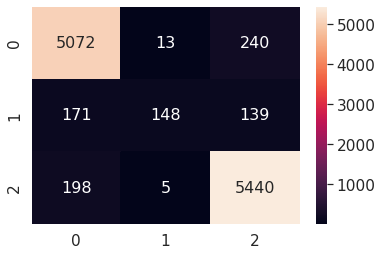

In [13]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cf, range(3), range(3))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

##Bài 2 Thay đổi cách mã hoá từ CountVectorizer thành TfIdfVectorizer ở Mục 2 (giữnguyên n-gram). So sánh hiệu năng của mô hình Naive Bayes đối với 2 cách mã hoá(sử dụng độ đo macro F1-score và ma trận nhầm lẫn để so sánh).


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
encoder = TfidfVectorizer(ngram_range=(2, 2))
encoder.fit(X_train[0])
encoder.vocabulary_

{'slide giáo': 19651,
 'giáo trình': 7042,
 'trình đầy': 23733,
 'đầy đủ': 30215,
 'nhiệt tình': 15712,
 'tình giảng': 24486,
 'giảng dạy': 7216,
 'dạy gần': 5850,
 'gần gũi': 7752,
 'gũi với': 7734,
 'với sinh': 27898,
 'sinh viên': 19599,
 'đi học': 29041,
 'học đầy': 9663,
 'đủ full': 31210,
 'full điểm': 6736,
 'điểm chuyên': 29158,
 'chuyên cần': 1996,
 'chưa áp': 2398,
 'áp dụng': 28786,
 'dụng công': 6383,
 'công nghệ': 4229,
 'nghệ thông': 14845,
 'thông tin': 21499,
 'tin và': 22823,
 'và các': 26723,
 'các thiết': 3263,
 'thiết bị': 20690,
 'bị hỗ': 1334,
 'hỗ trợ': 9803,
 'trợ cho': 24094,
 'cho việc': 1928,
 'việc giảng': 26506,
 'thầy giảng': 21839,
 'giảng bài': 7185,
 'bài hay': 567,
 'hay có': 7940,
 'có nhiều': 3872,
 'nhiều bài': 15482,
 'bài tập': 670,
 'tập ví': 25371,
 'ví dụ': 27343,
 'dụ ngay': 6325,
 'ngay trên': 14592,
 'trên lớp': 23548,
 'giảng viên': 7312,
 'viên đảm': 26412,
 'đảm bảo': 30149,
 'bảo thời': 1145,
 'thời gian': 22458,
 'gian lên': 6862,
 'lên

In [15]:
X_train_encoded = encoder.transform(X_train[0])
X_dev_encoded = encoder.transform(X_dev[0])
X_test_encoded = encoder.transform(X_test[0])


In [16]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

In [17]:
print(accuracy_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred, average='macro')*100)

92.39453877122352
62.84646961583835


##Bài 3

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
encoder = CountVectorizer(ngram_range=(2, 2))
encoder.fit(X_train[0])
encoder.vocabulary_
X_train_encoded = encoder.transform(X_train[0])
X_dev_encoded = encoder.transform(X_dev[0])
X_test_encoded = encoder.transform(X_test[0])
print("CountVectorizer")

CountVectorizer


In [19]:
from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()
model_NB.fit(X_train_encoded, y_train)
y_pred_NB = model_NB.predict(X_test_encoded)
print("Naive Bayes")
print(accuracy_score(y_test, y_pred_NB)*100)
print(f1_score(y_test, y_pred_NB, average='macro')*100)

Naive Bayes
93.29599159810957
78.86026734532533


In [21]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train_encoded, y_train)
y_pred_LR = model_LR.predict(X_test_encoded)
print("LogicsticRegression")
print(accuracy_score(y_test, y_pred_LR)*100)
print(f1_score(y_test, y_pred_LR, average='macro')*100)

LogicsticRegression
98.51216523717837
94.46666444490698


In [24]:
from sklearn.svm import LinearSVC
model_SVM = LinearSVC()
model_SVM.fit(X_train_encoded, y_train)
y_pred_SVM = model_SVM.predict(X_test_encoded)
print("SVM")
print(accuracy_score(y_test, y_pred_SVM)*100)
print(f1_score(y_test, y_pred_SVM, average='macro')*100)

SVM
99.57115350953964
98.56234897398643


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
encoder = TfidfVectorizer(ngram_range=(2, 2))
encoder.fit(X_train[0])
encoder.vocabulary_
X_train_encoded = encoder.transform(X_train[0])
X_dev_encoded = encoder.transform(X_dev[0])
X_test_encoded = encoder.transform(X_test[0])
print("TfidfVectorizer")

TfidfVectorizer


In [27]:
from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB()
model_NB.fit(X_train_encoded, y_train)
y_pred_NB = model_NB.predict(X_test_encoded)
print("Naive Bayes")
print(accuracy_score(y_test, y_pred_NB)*100)
print(f1_score(y_test, y_pred_NB, average='macro')*100)

Naive Bayes
92.39453877122352
62.84646961583835


In [28]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train_encoded, y_train)
y_pred_LR = model_LR.predict(X_test_encoded)
print("")
print("LogicsticRegression")
print(accuracy_score(y_test, y_pred_LR)*100)
print(f1_score(y_test, y_pred_LR, average='macro')*100)



LogicsticRegression
93.733590057763
72.1452760040947


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [30]:
from sklearn.svm import LinearSVC
model_SVM = LinearSVC()
model_SVM.fit(X_train_encoded, y_train)
y_pred_SVM = model_SVM.predict(X_test_encoded)
print("SVM")
print(accuracy_score(y_test, y_pred_SVM)*100)
print(f1_score(y_test, y_pred_SVM, average='macro')*100)

SVM
99.23857868020305
97.4811518285461


## Nhận xét: Với phương pháp TfidfVectorizer thì mô hình SVM cho kết quả tốt nhất. Còn với phương pháp CountVectorizer thì mô hình LogicsticRegression cho kết quả tốt nhất

##PHÂN TÍCH LỖI

In [31]:
confusion_matrix(y_test, y_pred_LR)

array([[5254,    0,   71],
       [ 305,   68,   85],
       [ 253,    2, 5388]])

In [32]:
confusion_matrix(y_test, y_pred_NB)

array([[5119,    0,  206],
       [ 282,    0,  176],
       [ 205,    0, 5438]])

In [33]:
confusion_matrix(y_test, y_pred_SVM)


array([[5319,    0,    6],
       [  30,  404,   24],
       [  25,    2, 5616]])